In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


class LinearRegression2():

    def __init__(self, learning_rate, iterations ,X, y):
          self.learning_rate = learning_rate
          self.iterations = iterations
          self.X = X
          self.y = y
          self.alpha = learning_rate
          self.X.insert(0, 'Ones', 1)
          self.X = np.matrix(self.X.values)
          self.y = np.matrix(self.y.values)
          self.theta = np.matrix(np.array([0] * self.X.shape[1]))
          self.cost = np.zeros(self.iterations)

    
    def computeCost(self):
      inner = np.power(((self.X * self.theta.T) - self.y), 2)
      return np.sum(inner) / (2 * len(self.X))

    def gradientDescent(self):
        self.theta = np.matrix(np.zeros(self.theta.shape))
        parameters = int(self.theta.ravel().shape[1])
        
        
        for i in range(self.iterations):
            error = (self.X * self.theta.T) - self.y
            
            for j in range(parameters):
                term = np.multiply(error, self.X[:,j])
                self.theta[0,j] = self.theta[0,j] - ((self.alpha / len(self.X)) * np.sum(term))
            self.cost[i] = self.computeCost()
            
    def newPredict(self,X):
      return X * self.theta.T



costs =  [0.37163307 0.29893075 0.25722481 0.23287144 0.21830209 0.20930601
 0.20353047 0.19965278 0.1969227  0.1949094  0.19336118 0.19212769
 0.19111647 0.19026867 0.1895454  0.18891984 0.18837281 0.18789007
 0.18746073 0.18707628 0.18672991 0.18641612 0.18613041 0.18586905
 0.18562897 0.18540757 0.18520267 0.18501244 0.18483531 0.18466995
 0.18451521 0.18437011 0.1842338  0.18410551 0.18398461 0.18387052
 0.18376272 0.18366077 0.18356425 0.1834728  0.18338609 0.18330383
 0.18322573 0.18315156 0.18308107 0.18301406 0.18295033 0.1828897
 0.18283201 0.18277709 0.18272479 0.18267499 0.18262754 0.18258233
 0.18253925 0.18249819 0.18245905 0.18242172 0.18238613 0.18235218
 0.1823198  0.18228891 0.18225943 0.18223131 0.18220447 0.18217885
 0.18215439 0.18213104 0.18210875 0.18208747 0.18206714 0.18204773
 0.18202919 0.18201148 0.18199456 0.18197839 0.18196295 0.18194819
 0.18193409 0.18192061 0.18190773 0.18189541 0.18188364 0.18187239
 0.18186163 0.18185135 0.18184151 0.18183211 0.1818231

Text(0.5, 1.0, 'Error vs. Training Epoch')

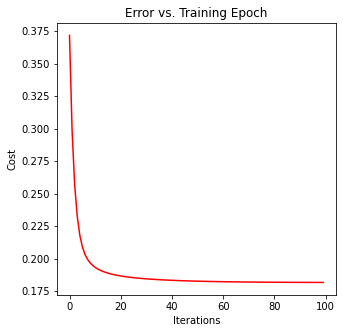

In [7]:
data = pd.read_csv('house_data.csv')

data = data[['grade', 'bathrooms', 'lat', 'sqft_living', 'view' , 'price']]

data = (data - data.mean()) / data.std()

flag = False
if flag:
    X = data[['sqft_living']]
else:
    X = data.loc[:,['grade', 'bathrooms', 'lat', 'sqft_living', 'view']]
y = data[['price']]

alpha = 0.1
iters = 100

linearModel = LinearRegression2(alpha , iters , X , y)
linearModel.gradientDescent()

print('costs = ' , linearModel.cost)
print('last Cost of the model = ' , linearModel.cost[-1])
print('**************************************')


# draw error graph

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(np.arange(iters), linearModel.cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')